In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [189]:
data = pd.read_csv("tmp_alexis_export_part-00000-61a1b846-9f22-4add-9e82-19837b6b6e7f-c000.csv")

#### Description of the data 
pji_value : useless

pji : vehicle Id

variableType / fluid : fluid type

Couple measure / phase : separation byte; enable to identify phase 

Each pji is linked to a vehicle

In [190]:
data.head().T

,0,1,2,3,4
sourceTimestamp,2019-04-02T11:33:31.609Z,2019-04-02T11:33:31.812Z,2019-04-02T11:33:31.812Z,2019-04-02T11:33:31.921Z,2019-04-02T11:33:32.015Z
variableName,PM2FRActPressionCharge,PM2FRActVolume,PM2FRActPressionCharge,PM2FRActVolume,PM2FRActVolume
machine,PosteMobile_2,PosteMobile_2,PosteMobile_2,PosteMobile_2,PosteMobile_2
variableType,FluideFR,FluideFR,FluideFR,FluideFR,FluideFR
phase,Phase_2,Phase_2,Phase_2,Phase_2,Phase_2
measure,MesureFluide_2,MesureFluide_2,MesureFluide_2,MesureFluide_2,MesureFluide_2
dataValue,519,1,230,2,3
pji_value,NaN,NaN,NaN,NaN,NaN
pji,1.41119e+06,1.41119e+06,1.41119e+06,1.41119e+06,1.41119e+06
measurement,PressionCharge,Volume,PressionCharge,Volume,Volume


#### Number of cycles

In [191]:
data.pji.drop_duplicates().shape[0]

11844

In [192]:
pd.crosstab(data.variableType, "Number of observations")

col_0,Number of observations
variableType,
FluideFR,11489265
FluideHFO,1425687
FluideRM,9424371


In [193]:
pd.crosstab(data.variableName, "Number of observations")

col_0,Number of observations
variableName,
PM1FRActPressionCharge,2604097
PM1FRActVide,819637
PM1FRActVolume,1323252
PM1HFOActMasse,225792
PM1HFOActPressionCharge,211101
PM1HFOActPressionResiduelle,661
PM1HFOActVide,249745
PM1RMActPressionCharge,1151676
PM1RMActTemperature,33846


#### Example of cycles 

In [194]:
pji_list = data.pji.drop_duplicates()
three_first = data[data.pji.isin(pji_list[0:3].tolist())]

In [195]:
pd.crosstab(three_first.variableName, "Number of observations")

col_0,Number of observations
variableName,
PM2FRActPressionCharge,2250
PM2FRActVide,566
PM2FRActVolume,672
PM2HFOActMasse,152
PM2HFOActPressionCharge,172
PM2HFOActVide,200
PM2RMActPressionCharge,540
PM2RMActTemperature,25
PM2RMActVide,564


In [196]:
def show_cycle(cycle_data):
    cycle_data = cycle_data.sort_values(by=['sourceTimestamp_dtformat'])
    x_axis = cycle_data.sourceTimestamp_dtformat
    y_axis = cycle_data.dataValue

    plt.figure(figsize=(20,5))
    plt.plot(x_axis, y_axis)
    plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


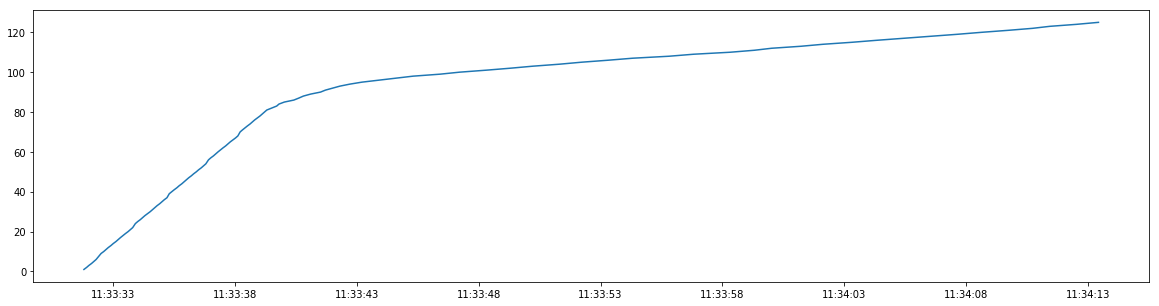

count    226.000000
mean      65.477876
std       36.499034
min        1.000000
25%       34.000000
50%       67.000000
75%       97.000000
max      125.000000
Name: dataValue, dtype: float64


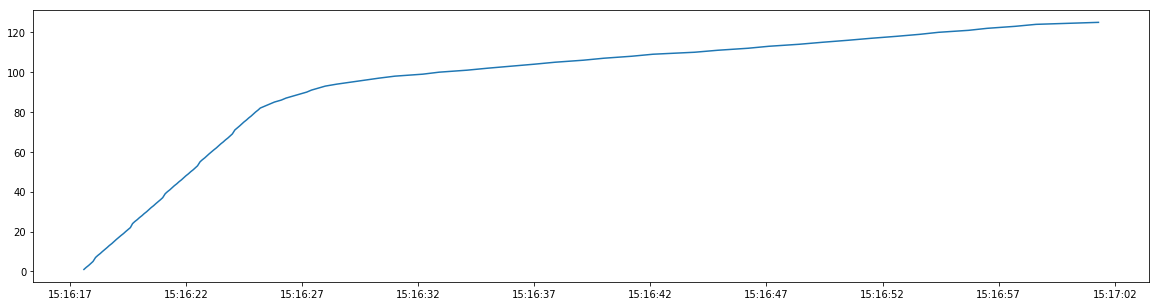

count    224.000000
mean      65.883929
std       36.440195
min        1.000000
25%       33.750000
50%       67.500000
75%       97.250000
max      125.000000
Name: dataValue, dtype: float64


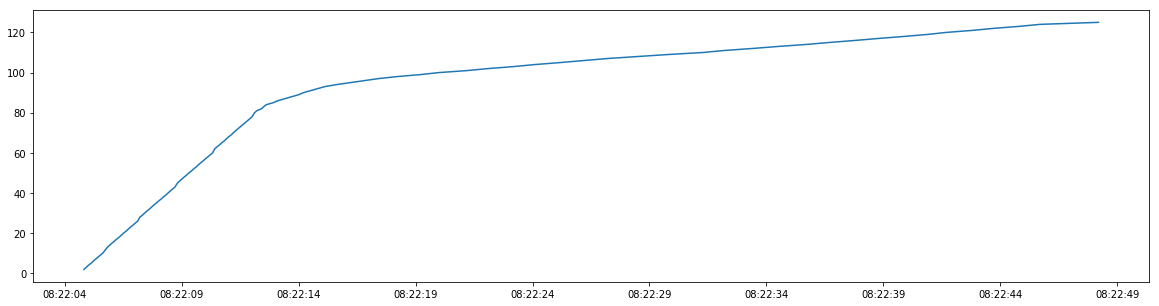

count    222.000000
mean      65.738739
std       36.534422
min        2.000000
25%       34.250000
50%       68.000000
75%       97.750000
max      125.000000
Name: dataValue, dtype: float64


In [197]:
for i in range(3):
    exemple2 = data[(data.pji==pji_list.iloc[i]) & (data.variableName=="PM2FRActVolume")]
    #exemple2 = data[data.pji==pji_list.iloc[i]] 
    #print(exemple2.head())
    exemple2["sourceTimestamp_dtformat"] = pd.to_datetime(exemple2.sourceTimestamp)
    show_cycle(exemple2)
    print(exemple2['dataValue'].describe())
    del exemple2

#### Extraction of a single serie 

In [200]:
machine_name = "PosteMobile_2"
indicator = "PM2FRActPressionCharge"
selector = (data.machine==machine_name) & (data.variableName==indicator) & (pd.notnull(data.sourceTimestamp))
data["sourceTimestamp_dtformat"] = pd.to_datetime(data.sourceTimestamp)
target_serie = data.loc[selector, ['dataValue', 'pji', 'sourceTimestamp_dtformat']]

In [201]:
target_serie.describe()

,dataValue,pji
count,4.388746e+06,4.388746e+06
mean,4.002172e+02,1.502915e+06
std,1.415977e+02,2.270641e+05
min,0.000000e+00,1.501060e+05
25%,2.110000e+02,1.330040e+06
50%,4.840000e+02,1.511599e+06
75%,5.070000e+02,1.630215e+06
max,5.760000e+02,2.750006e+06


In [202]:
target_serie.columns

Index(['dataValue', 'pji', 'sourceTimestamp_dtformat'], dtype='object')

        dataValue
count  722.000000
mean   407.297784
std    139.904222
min    191.000000
25%    235.000000
50%    485.000000
75%    512.000000
max    570.000000


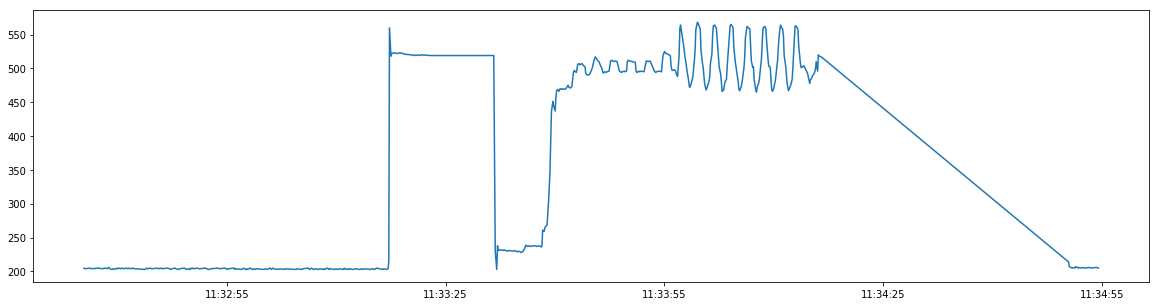

        dataValue
count  708.000000
mean   410.200565
std    138.837279
min    203.000000
25%    230.000000
50%    486.500000
75%    510.000000
max    568.000000


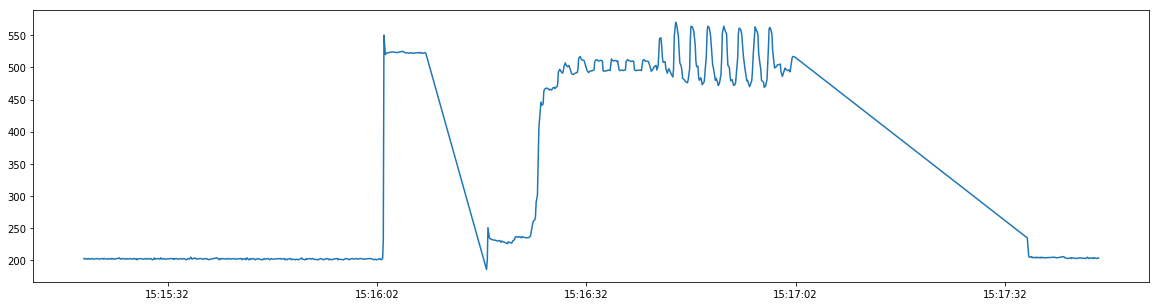

        dataValue
count  761.000000
mean   395.876478
std    143.482442
min    186.000000
25%    204.000000
50%    482.000000
75%    508.000000
max    570.000000


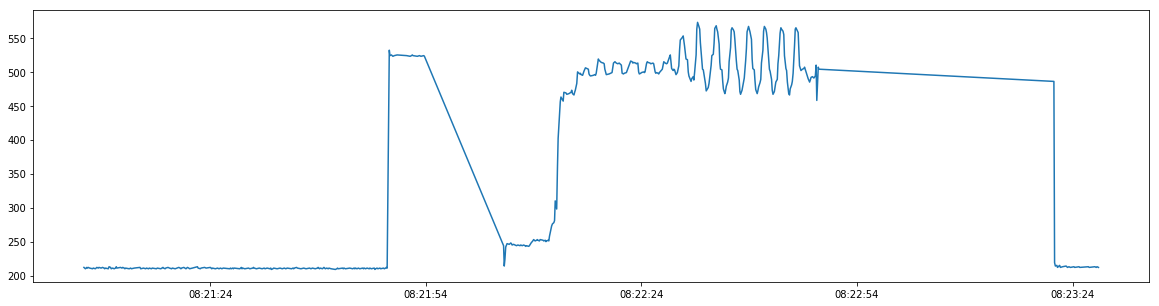

In [213]:
pji_list = data.pji.drop_duplicates()
for i in range(3):
    print(cycle_data.describe())
    cycle_data = target_serie[target_serie.pji==pji_list.iloc[i]][['sourceTimestamp_dtformat', 'dataValue']]
    cycle_data = cycle_data.sort_values(by=['sourceTimestamp_dtformat'])
    x_axis = cycle_data.sourceTimestamp_dtformat
    y_axis = cycle_data.dataValue

    plt.figure(figsize=(20,5))
    plt.plot(x_axis, y_axis)
    plt.show()

In [214]:
target_serie.to_csv("data_dl.csv", index=False)